In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
banknotes_data = pd.read_csv("banknotes.csv")

# Display the first few rows of the dataset and its summary info
banknotes_data.head(), banknotes_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variace   1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


(   variace  skewness  curtosis  entropy  class
 0  3.62160    8.6661   -2.8073 -0.44699      0
 1  4.54590    8.1674   -2.4586 -1.46210      0
 2  3.86600   -2.6383    1.9242  0.10645      0
 3  3.45660    9.5228   -4.0112 -3.59440      0
 4  0.32924   -4.4552    4.5718 -0.98880      0,
 None)

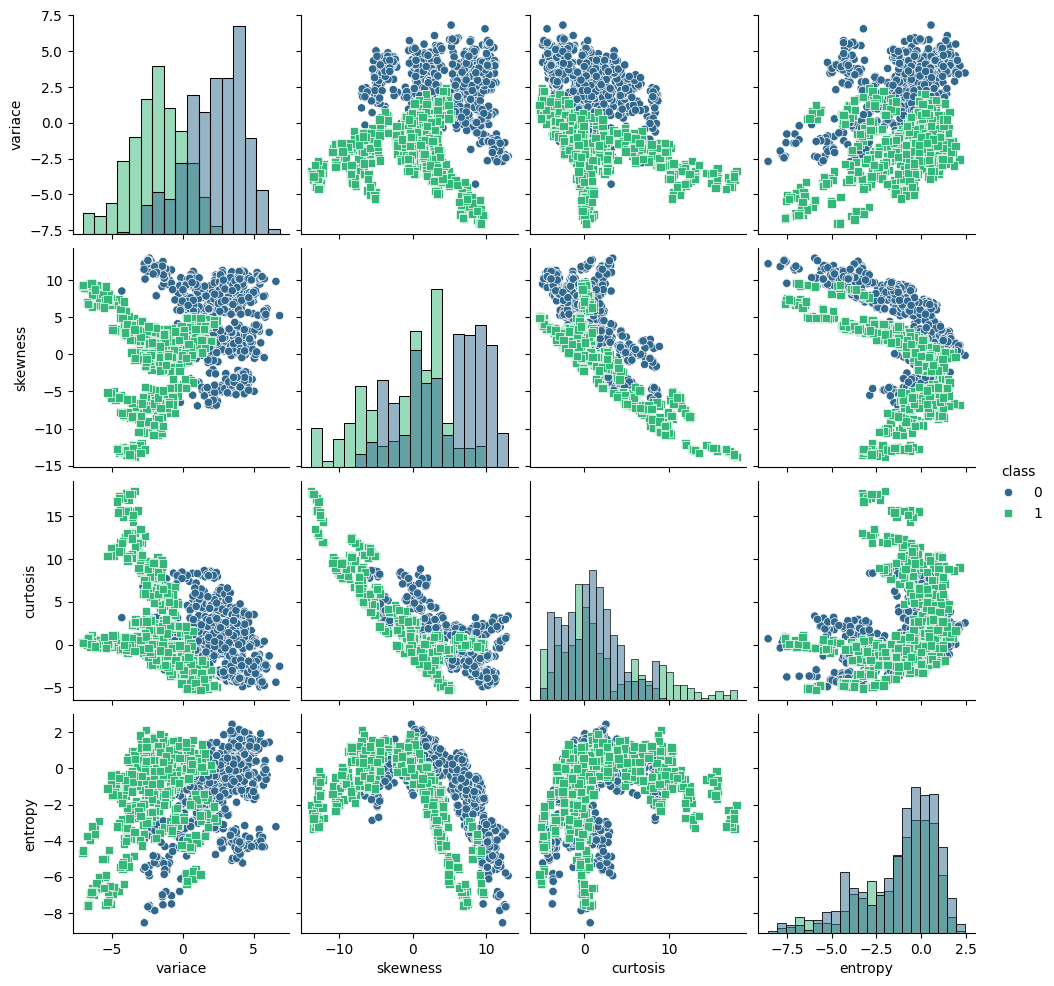

In [22]:
# Creating a pair plot with explicitly set parameters for diag_kind and kind
pair_plot = sns.pairplot(banknotes_data, hue='class', palette='viridis', markers=["o", "s"], diag_kind='hist', kind='scatter')
plt.show()


In [23]:
# Step IV: Describe the data
data_description = banknotes_data.describe()

# Step V: Count the number of observations per class
class_counts = banknotes_data['class'].value_counts()

data_description, class_counts


(           variace     skewness     curtosis      entropy        class
 count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
 mean      0.433735     1.922353     1.397627    -1.191657     0.444606
 std       2.842763     5.869047     4.310030     2.101013     0.497103
 min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
 25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
 50%       0.496180     2.319650     0.616630    -0.586650     0.000000
 75%       2.821475     6.814625     3.179250     0.394810     1.000000
 max       6.824800    12.951600    17.927400     2.449500     1.000000,
 class
 0    762
 1    610
 Name: count, dtype: int64)

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(64, input_shape=(4,), activation='tanh'),  # Input layer with 4 input features
    Dense(64, activation='tanh'),                    # Additional hidden layer
    Dense(1, activation='sigmoid')                   # Output layer
])

# Compile the model with the adam optimizer and binary_crossentropy as the loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Provide model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                320       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4545 (17.75 KB)
Trainable params: 4545 (17.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import History

# Data preparation
X = banknotes_data.drop('class', axis=1).values  # Input features
y = banknotes_data['class'].values              # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
29/29 [==============================] - 1s 10ms/step - loss: 0.3577 - accuracy: 0.8542 - val_loss: 0.2042 - val_accuracy: 0.9426
Epoch 2/50
29/29 [==============================] - 0s 4ms/step - loss: 0.1394 - accuracy: 0.9630 - val_loss: 0.1074 - val_accuracy: 0.9801
Epoch 3/50
29/29 [==============================] - 0s 3ms/step - loss: 0.0757 - accuracy: 0.9837 - val_loss: 0.0643 - val_accuracy: 0.9845
Epoch 4/50
29/29 [==============================] - 0s 5ms/step - loss: 0.0470 - accuracy: 0.9924 - val_loss: 0.0438 - val_accuracy: 0.9934
Epoch 5/50
29/29 [==============================] - 0s 4ms/step - loss: 0.0318 - accuracy: 0.9989 - val_loss: 0.0328 - val_accuracy: 1.0000
Epoch 6/50
29/29 [==============================] - 0s 4ms/step - loss: 0.0229 - accuracy: 1.0000 - val_loss: 0.0235 - val_accuracy: 0.9978
Epoch 7/50
29/29 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 8/50
29/29 [=

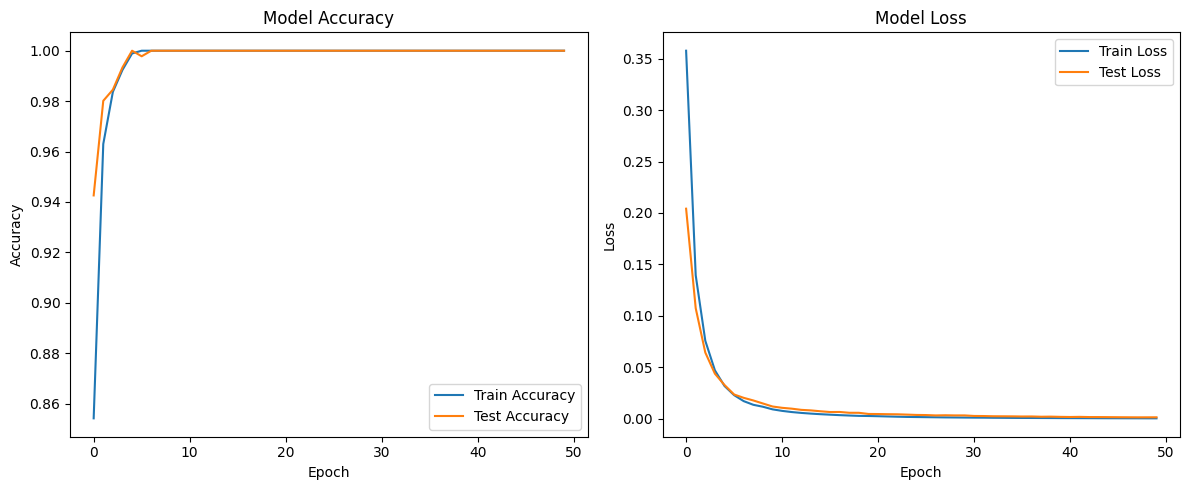

In [26]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()